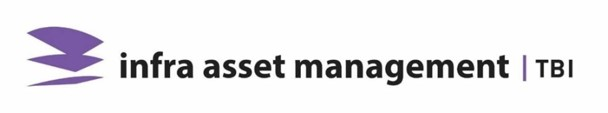

# 1. Import all required Python packages into the environment
Import all Python packages/dependencies needed for the Jupyter notebook to run. 

## What if a package is missing?
If a package is missing you can install the packages with pip installer for Python:

```
!pip3 install packagename
```


* Tutorial for using pip for Python: https://www.youtube.com/watch?v=mFqdeX1C-8M_

In [81]:
import time
import datetime
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import gridspec
import json
import requests
from collections import Counter
from IPython.display import FileLink
plt.style.use('dark_background')

# 2. Declare the required variables needed to run and filter your data export result.

You can use these variables or params to adjust your dataset, for example you can choose which PO number you want to use or specify your preferred Workorder status in the __query__ param.

In [82]:
""" In the line bellow fill in your API key without < and > """ 
api_key = 'TVVMTEVSX1A6QEJvZWluZzIwMQ==' # provided to you by a Maximo Consultant

""" In the line bellow fill in the desired object structure """
obj_struct = 'SND_PTR' # name of the Maximo object structure

""" In the line bellow fill in the PO number and the SITEID without the < and > """
#query = 'pmnum="1" and siteid="MAVA"'
query = 'pmnum="802" and siteid="MAVA" and reportdate>="2018-01-01T00:00:00-00:00"'
#query = 'pmnum>"61" and pmnum<"66" and siteid="MAVA" and reportdate>="2020-01-01T00:00:00-00:00" and reportdate<="2020-12-31T00:00:00-00:00"'

# 3. Declare the GET request function: `get_response(query)`.
This so called GET request does exactly what is says, it GETS data straight from the Maximo application by sending a request using the above params in the query string.

* More information about the Maximo API: https://interprosoft.com/maximotimes/maximo/mif/exclusive-look-maximo-rest-web-service-api/

* More information about the Maximo query's: https://www.ibm.com/support/knowledgecenter/SSMAMS/com.ibm.mif.doc/gp_intfrmwk/oslc/r_oslc_query_params.html

In [83]:
def get_response(query) :
    """
    Function to launch the GET request to the Maximo application.
    :param query: The query variable defined in '2. Declare the required 
                  variables needed to run and filter your data export result.'
    :return: The respone of the Maximo application.
    """
    api_url = 'https://maximo.tbi.nl/maximo/oslc/os/' + obj_struct + '?'
    # Set up header dictionary w/ API key according to documentation
    headers = {
        'maxauth': api_key,
    }
    # Set up the params dictionary according to documentation
    params = {
        'lean' : 1, # no namespace in JSON
        '_dropnulls' : 0, # don't pass null values
        'Accept':'application/json', # set JSON as default output
        'oslc.where' : query,
    }
    # Call the API
    response = requests.get(api_url,
                            headers=headers,
                            params=params)

    if response.status_code == 200:
        print('Success!')
    elif response.status_code == 404:
        print('ApiError')

    return response

# 4. Run the function: `get_response(query)` with the previously declared variable __query__ as inputvariable and save the result as: __response_data__.

In [84]:
response_data = get_response(query)

Success!


# 5. Isolate the JSON data from the response object and save the result as: __json_data__.

In [85]:
json_data = response_data.json()
json_data

{'href': 'https://maximo.tbi.nl/maxrest/oslc/os/SND_PTR',
 'member': [{'href': 'https://maximo.tbi.nl/maxrest/oslc/os/snd_ptr/_TUFWQS8xMjQyNjA5'},
  {'href': 'https://maximo.tbi.nl/maxrest/oslc/os/snd_ptr/_TUFWQS8xNDExMTU4'},
  {'href': 'https://maximo.tbi.nl/maxrest/oslc/os/snd_ptr/_TUFWQS8xNTcyOTQx'}],
 'responseInfo': {'href': 'https://maximo.tbi.nl/maxrest/oslc/os/SND_PTR?lean=1&_dropnulls=0&Accept=application%2Fjson&oslc.where=pmnum%3D%22802%22+and+siteid%3D%22MAVA%22+and+reportdate%3E%3D%222018-01-01T00%3A00%3A00-00%3A00%22'}}

# 6. Load the _'member'_ values to a new DataFrame: __df__ and use the Pandas `df.info()` method to print all information about the __df__ DataFrame. For example, you can see the number of instances (entries) which refers to the number of WO's.

The result is a Pandas DataFrame which contains unique href's (hyperlink reference). Each href stands for an unique instance of the query result (for example an indivdual workorder or register of an asset) stored as a URL. To get the data from all href's in the series you have to send an indivdual GET request to each URL.


In [86]:
df = pd.DataFrame(json_data['member'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   href    3 non-null      object
dtypes: object(1)
memory usage: 152.0+ bytes


# 7. Create a new empty DataFrame: __new_df__ for the upcomming _for loop_ in which we will send a individual GET request to each href from Pandas DataFrame __df__. 

In [87]:
new_df = pd.DataFrame()

# 8. Run a _for loop_ that iterates over each href inside the __df['href']__ column, sends a GET request to it and appends the response data to the DataFrame: __new_df__.



In [88]:
for value in df['href'] :
      url = value
      headers = {
        'maxauth': api_key,
      }
      url_params = {
        'lean':1,
        '_dropnulls':0,
        'Accept':'application/json'
    }
      r = requests.get(url, headers=headers, params=url_params)

      response_data = r.json()

      new_df = new_df.append(response_data, ignore_index=True)

# 9. Use the Pandas `df.info()` function to learn more about the data inside the DataFrame: __new_df__.

In [89]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   _rowstamp                    3 non-null      object 
 1   actfinish                    3 non-null      object 
 2   actstart                     3 non-null      object 
 3   description                  3 non-null      object 
 4   description_longdescription  3 non-null      object 
 5   hasld                        3 non-null      float64
 6   hasparent                    3 non-null      float64
 7   href                         3 non-null      object 
 8   jpnum                        3 non-null      object 
 9   jptask                       3 non-null      object 
 10  langcode                     3 non-null      object 
 11  parent                       3 non-null      object 
 12  pmnum                        3 non-null      object 
 13  reportdate              

# 10. Create a new DataFrame: __df_wo__ in which you save the unique WONUMS and their upper level dates from the first DataFrame: __new_df__ for further usage in this Notebook.

In [90]:
df_wo = new_df[['wonum', 'reportdate', 'actstart', 'actfinish']]
df_wo.info()
df_wo

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   wonum       3 non-null      object
 1   reportdate  3 non-null      object
 2   actstart    3 non-null      object
 3   actfinish   3 non-null      object
dtypes: object(4)
memory usage: 224.0+ bytes


,wonum,reportdate,actstart,actfinish
0,1242609,2018-04-16T13:57:47+02:00,,2018-05-14T11:51:00+02:00
1,1411158,2019-05-09T13:22:57+02:00,2019-05-27T10:00:00+02:00,2019-05-27T15:00:00+02:00
2,1572941,2020-04-08T09:33:34+02:00,2020-06-22T10:00:00+02:00,2020-06-22T15:00:00+02:00


# 11. Flatten the nested JSON objects, filter and append them to the __result__ DataFrame.
___

If we would run the outcommented Pandas function `new_df.head(2)` in the code cell above and plot the first 2 records of the __new_df__ DataFrame we would see that there are 4 columns inside the DataFrame that contains so called _nested JSON objects_. 

 - locations
 - asset
 - jobplan
 - measureunit

These nested JSON objects need to be flattened and appended to seperate DataFrames to access/filter the data inside them so they can be appended to the master DataFrame __result__.

To do so we have to run 4 different _for loops_ in which we create a new DataFrame for each column in the __new_df__ DataFrame, iterate over it and append its key value pairs to the new DataFrame.

We will do this in 5 steps:
* 11.1 Create DataFrame __df_lc__ and loop over the __new_df['locations']__ column
* 11.2 Create DataFrame __df_as__ and loop over the __new_df['asset']__ column
* 11.3 Create DataFrame __df_jp__ and loop over the __new_df['jobplan']__ column
* 11.4 Create DataFrame __df_jp2__ in which you save the filtered __df_jp__ DataFrame
* 11.5 Create DataFrame __df_mu__ and loop over the __new_df['measureunit']__ column
* 11.6 Concat the DataFrames: __df_lc__, __df_as__, __df_jp2__, __df_mu__ to a new DataFrame __result__

After each step run the `df.head(3)` function to plot the first 3 results

___

### 11.1 Create a new empty DataFrame: __df_lc__ for the nested column __new_df['locations']__, loop over the column with a _for loop_ and append the data to the DataFrame.

In [91]:
df_lc = pd.DataFrame()

for i in range(len(new_df)):  # It's important to itarate over the range of the length of a DataFrame
    row = new_df.iloc[i]

    # Isolating the whole nested json in the column 'woactivity'
    nested_json = row['woactivity']
    try:
      len_nested_json = len(nested_json)

      # Iterating over every element in the nested json
      for ii in range(len_nested_json):

          # Try to read the data per element using json_normalize
          try:
            # Check if the element of the nested_json is an instance of a list
            # When the element is not an instance of a list, a KeyError will be forced
            if isinstance(nested_json[ii]['locations'], list): 
              json_data = pd.json_normalize(data=row['woactivity'][ii],
                                            record_path='locations',
                                            meta=['measurementvalue',
                                                  'inspector',
                                                  'measuredate',
                                                  'taskid',
                                                  'reportdate',
                                                  'description',
                                                  'gmbmemo',
                                                  'observation'],
                                            meta_prefix='wo_',
                                            record_prefix='lc_')
              
          # We can assume that the data is missing whenever it can't be read
          # In that case a row in which all cell have a value of '-1' will be assigned       
          except KeyError as e:
              n = -1
              json_data = [{'lc__rowstamp': n, 'lc_location': n, 'lc_description': n, 'lc_localref': n, 'lc_href': n,
                            'wo_measurementvalue': n, 'wo_inspector': n, 'wo_measuredate': n,	'wo_taskid': n, 'wo_reportdate': n,
                            'wo_description': n, 'wo_gmbmemo': n, 'wo_observation': n}]

          # The final step of appending the row with the json data (or the filler row) to the DataFrame
          finally:
              df_lc = df_lc.append(json_data)  
    except:
      # Skips workorders wothout any jobrows (like MAVA PM:64)
      pass


print(json_data)

# Printing the length of the DataFrame
print(f'len df_lc = {len(df_lc)}')

# Reindexing the DataFrame
df_lc = df_lc.reset_index(drop=True)

# Prints the column names and the first three rows of the DataFrame 
df_lc.head(3)

  lc__rowstamp lc_location                      lc_description  \
0   2516625283        3385  Sectie 3-Korte overspanningen oost   

                                         lc_localref lc_gmbgebruimtenr  \
0  https://maximo.tbi.nl/maxrest/oslc/os/snd_ptr/...              3385   

                                             lc_href wo_measurementvalue  \
0  http://childkey#V09SS09SREVSL1dPQUNUSVZJVFkvTE...                       

  wo_inspector             wo_measuredate wo_taskid  \
0        VOS_S  2020-07-02T09:17:31+02:00        10   

               wo_reportdate                   wo_description wo_gmbmemo  \
0  2020-04-08T09:35:21+02:00  Inspecteer status muizenlokdoos              

  wo_observation  
0           Goed  
len df_lc = 414


,lc__rowstamp,lc_location,lc_description,lc_localref,lc_gmbgebruimtenr,lc_href,wo_measurementvalue,wo_inspector,wo_measuredate,wo_taskid,wo_reportdate,wo_description,wo_gmbmemo,wo_observation
0,2516620245,3312,"Sectie 3-RW A15 HRR 44,950-47,600",https://maximo.tbi.nl/maxrest/oslc/os/snd_ptr/...,3312,http://childkey#V09SS09SREVSL1dPQUNUSVZJVFkvTE...,,DEFEITER_P,2018-05-14T10:46:06+02:00,10,2018-04-16T13:57:48+02:00,Inspecteer conditie slot,,Goed
1,2516620245,3312,"Sectie 3-RW A15 HRR 44,950-47,600",https://maximo.tbi.nl/maxrest/oslc/os/snd_ptr/...,3312,http://childkey#V09SS09SREVSL1dPQUNUSVZJVFkvTE...,,DEFEITER_P,2018-05-14T10:46:09+02:00,20,2018-04-16T13:57:48+02:00,Inspecteer conditie kast afdichting,,Goed
2,2516620245,3312,"Sectie 3-RW A15 HRR 44,950-47,600",https://maximo.tbi.nl/maxrest/oslc/os/snd_ptr/...,3312,http://childkey#V09SS09SREVSL1dPQUNUSVZJVFkvTE...,,DEFEITER_P,2018-05-14T10:46:20+02:00,30,2018-04-16T13:57:49+02:00,Inspecteer conditie kast,,Goed


### 11.2 Create a new empty DataFrame: __df_as__ for the nested column __new_df['asset']__, loop over the column with a _for loop_ and append the data to the DataFrame.

In [92]:
df_as = pd.DataFrame()

for i in range(len(new_df)): # It's important to itarate over the range of the length of a DataFrame
    row = new_df.iloc[i]

    # Isolating the whole nested json in the column 'woactivity'
    nested_json = row['woactivity']
    try:
      len_nested_json = len(nested_json)

      # Iterating over every element in the nested json
      for ii in range(len_nested_json):

          # Try to read the data per element using json_normalize
          try:
            # Check if the element of the nested_json is an instance of a list
            # When the element is not an instance of a list, a KeyError will be forced
            if isinstance(nested_json[ii]['asset'], list): 
              json_data = pd.json_normalize(data=row['woactivity'][ii],
                                            record_path='asset',
                                            record_prefix='as_')

          # We can assume that the data is missing whenever it can't be read
          # In that case a row in which all cell have a value of '-1' will be assigned   
          except KeyError as e:
              n = -1
              json_data = [{'as_assetnum': n, 'as__rowstamp': n, 'as_description': n, 'as_localref': n, 'as_href': n}]

          # The final step of appending the row with the json data (or the filler row) to the DataFrame
          finally:
              df_as = df_as.append(json_data)
    except:
      # Skips workorders wothout any jobrows (like MAVA PM:64)
      pass

# print(json_data)

# Printing the length of the DataFrame
print(f'len df_as = {len(df_as)}')

# Reindexing the DataFrame
df_as = df_as.reset_index(drop=True)

# Prints the column names and the first three rows of the DataFrame 
df_as.head(3)

len df_as = 414


,as_assetnum,as__rowstamp,as_description,as_localref,as_href
0,M004631,2417957427,6141WKS2305 - Wegkantsysteem (WKS),https://maximo.tbi.nl/maxrest/oslc/os/snd_ptr/...,http://childkey#V09SS09SREVSL1dPQUNUSVZJVFkvQV...
1,M004631,2417957427,6141WKS2305 - Wegkantsysteem (WKS),https://maximo.tbi.nl/maxrest/oslc/os/snd_ptr/...,http://childkey#V09SS09SREVSL1dPQUNUSVZJVFkvQV...
2,M004631,2417957427,6141WKS2305 - Wegkantsysteem (WKS),https://maximo.tbi.nl/maxrest/oslc/os/snd_ptr/...,http://childkey#V09SS09SREVSL1dPQUNUSVZJVFkvQV...


### 11.3 Create a new empty DataFrame: __df_jp__ for the nested column __new_df['jobplan']__, loop over the column with a _for loop_ and append the data to the DataFrame.

In [93]:
df_jp = pd.DataFrame()

for i in range(len(new_df)): # It's important to itarate over the range of the length of a DataFrame
    row = new_df.iloc[i]

    # Isolating the whole nested json in the column 'woactivity'
    nested_json = row['woactivity']
    try:
      len_nested_json = len(nested_json)

      # Iterating over every element in the nested json
      for ii in range(len_nested_json):

          # Try to read the data per element using json_normalize
          try:
            # Check if the element of the nested_json is an instance of a list
            # When the element is not an instance of a list, a KeyError will be forced
            if isinstance(nested_json[ii]['jobplan'], list):
              json_data = pd.json_normalize(data=row['woactivity'][ii],
                                            record_path='jobplan',
                                            record_prefix='jp_')

          # We can assume that the data is missing whenever it can't be read
          # In that case a row in which all cell have a value of '-1' will be assigned       
          except:
              n = -1
              json_data = [{'jp_jpnum': n, 'jp__rowstamp': n, 'jp_orgid': n, 'jp_pluscrevnum': n, 'jp_localref': n, 'jp_href': n}]

          # The final step of appending the row with the json data (or the filler row) to the DataFrame             
          finally:
              df_jp = df_jp.append(json_data)
    except:
      # Skips workorders wothout any jobrows (like MAVA PM:64)
      pass
      
# print(json_data)

# Printing the length of the DataFrame
print(f'len df_jp = {len(df_jp)}')

# Prints the number of different revisionnumbers (whenever there are multiple the script will fail)
print(Counter(df_jp['jp_pluscrevnum']))

# Reindexing the DataFrame
df_jp = df_jp.reset_index(drop=True)

# Prints the column names and the first three rows of the DataFrame 
df_jp.head(3)

len df_jp = 444
Counter({0: 414, 1: 30})


,jp_jpnum,jp__rowstamp,jp_orgid,jp_pluscrevnum,jp_localref,jp_href
0,TP-I-61-41-02,2438254327,CROON,0,https://maximo.tbi.nl/maxrest/oslc/os/snd_ptr/...,http://childkey#V09SS09SREVSL1dPQUNUSVZJVFkvSk...
1,TP-I-61-41-02,2438254327,CROON,0,https://maximo.tbi.nl/maxrest/oslc/os/snd_ptr/...,http://childkey#V09SS09SREVSL1dPQUNUSVZJVFkvSk...
2,TP-I-61-41-02,2438254327,CROON,0,https://maximo.tbi.nl/maxrest/oslc/os/snd_ptr/...,http://childkey#V09SS09SREVSL1dPQUNUSVZJVFkvSk...


### 11.4 Run a query with Pandas function: `df.query()` to filter out all the double revisions. Save the result as a DataFrame: __df_jp2__.

In [94]:
df_jp2 = df_jp.query('jp_pluscrevnum == "0"')
print(Counter(df_jp2['jp_pluscrevnum']))
df_jp2.reset_index(inplace=True)
df_jp2.head()

Counter({0: 414})


,index,jp_jpnum,jp__rowstamp,jp_orgid,jp_pluscrevnum,jp_localref,jp_href
0,0,TP-I-61-41-02,2438254327,CROON,0,https://maximo.tbi.nl/maxrest/oslc/os/snd_ptr/...,http://childkey#V09SS09SREVSL1dPQUNUSVZJVFkvSk...
1,1,TP-I-61-41-02,2438254327,CROON,0,https://maximo.tbi.nl/maxrest/oslc/os/snd_ptr/...,http://childkey#V09SS09SREVSL1dPQUNUSVZJVFkvSk...
2,2,TP-I-61-41-02,2438254327,CROON,0,https://maximo.tbi.nl/maxrest/oslc/os/snd_ptr/...,http://childkey#V09SS09SREVSL1dPQUNUSVZJVFkvSk...
3,3,TP-I-61-41-02,2438254327,CROON,0,https://maximo.tbi.nl/maxrest/oslc/os/snd_ptr/...,http://childkey#V09SS09SREVSL1dPQUNUSVZJVFkvSk...
4,4,TP-I-61-41-02,2438254327,CROON,0,https://maximo.tbi.nl/maxrest/oslc/os/snd_ptr/...,http://childkey#V09SS09SREVSL1dPQUNUSVZJVFkvSk...


### 11.5 Create a new empty DataFrame: __df_mu__ for the nested column __new_df['measureunit']__, loop over the column with a _for loop_ and append the data to the DataFrame.

In [95]:
df_mu = pd.DataFrame()

for i in range(len(new_df)): # It's important to itarate over the range of the length of a DataFrame
    row = new_df.iloc[i]

    # Isolating the whole nested json in the column 'woactivity'
    nested_json = row['woactivity']
    try:
      len_nested_json = len(nested_json)

      # Iterating over every element in the nested json
      for ii in range(len_nested_json):

          # Try to read the data per element using json_normalize
          try:
            # Check if the element of the nested_json is an instance of a list
            # When the element is not an instance of a list, a KeyError will be forced
              if isinstance(nested_json[ii]['measureunit'], list):
                json_data = pd.json_normalize(data=row['woactivity'][ii],
                                              record_path='measureunit',
                                              record_prefix='mu_')
              
              else:
                  pass
          
          # We can assume that the data is missing whenever it can't be read
          # In that case a row in which all cell have a value of '-1' will be assigned 
          except:
              n = -1
              json_data = [{'mu__rowstamp': n, 'mu_orgid': n, 'mu_measureunitid': n, 'mu_description': n, 'mu_localref': n, 'mu_abbreviation': n, 'mu_href': n}]

          # The final step of appending the row with the json data (or the filler row) to the DataFrame
          finally:
              df_mu = df_mu.append(json_data)
    except:
      # Skips workorders wothout any jobrows (like MAVA PM:64)
      pass

#print(json_data)

# Printing the length of the DataFrame
print(f'len df_mu = {len(df_mu)}')

# Reindexing the DataFrame
df_mu = df_mu.reset_index(drop=True)

# Prints the column names and the first three rows of the DataFrame 
df_mu.head(3)

len df_mu = 414


,mu__rowstamp,mu_orgid,mu_measureunitid,mu_description,mu_localref,mu_abbreviation,mu_href
0,-1,-1,-1,-1,-1,-1,-1
1,-1,-1,-1,-1,-1,-1,-1
2,-1,-1,-1,-1,-1,-1,-1


### 11.6 Concat the DataFrames: __df_lc__, __df_as__, __df_jp2__, __df_mu__ with the Pandas function: `pd.concat()` to a new DataFrame: __result__.

In [96]:
result = pd.DataFrame()

result = pd.concat([df_lc, df_as, df_jp2, df_mu], axis=1)

print(f"Length of DataFrame = {len(result)}")

result.head(3)

Length of DataFrame = 414


,lc__rowstamp,lc_location,lc_description,lc_localref,lc_gmbgebruimtenr,lc_href,wo_measurementvalue,wo_inspector,wo_measuredate,wo_taskid,...,jp_pluscrevnum,jp_localref,jp_href,mu__rowstamp,mu_orgid,mu_measureunitid,mu_description,mu_localref,mu_abbreviation,mu_href
0,2516620245,3312,"Sectie 3-RW A15 HRR 44,950-47,600",https://maximo.tbi.nl/maxrest/oslc/os/snd_ptr/...,3312,http://childkey#V09SS09SREVSL1dPQUNUSVZJVFkvTE...,,DEFEITER_P,2018-05-14T10:46:06+02:00,10,...,0,https://maximo.tbi.nl/maxrest/oslc/os/snd_ptr/...,http://childkey#V09SS09SREVSL1dPQUNUSVZJVFkvSk...,-1,-1,-1,-1,-1,-1,-1
1,2516620245,3312,"Sectie 3-RW A15 HRR 44,950-47,600",https://maximo.tbi.nl/maxrest/oslc/os/snd_ptr/...,3312,http://childkey#V09SS09SREVSL1dPQUNUSVZJVFkvTE...,,DEFEITER_P,2018-05-14T10:46:09+02:00,20,...,0,https://maximo.tbi.nl/maxrest/oslc/os/snd_ptr/...,http://childkey#V09SS09SREVSL1dPQUNUSVZJVFkvSk...,-1,-1,-1,-1,-1,-1,-1
2,2516620245,3312,"Sectie 3-RW A15 HRR 44,950-47,600",https://maximo.tbi.nl/maxrest/oslc/os/snd_ptr/...,3312,http://childkey#V09SS09SREVSL1dPQUNUSVZJVFkvTE...,,DEFEITER_P,2018-05-14T10:46:20+02:00,30,...,0,https://maximo.tbi.nl/maxrest/oslc/os/snd_ptr/...,http://childkey#V09SS09SREVSL1dPQUNUSVZJVFkvSk...,-1,-1,-1,-1,-1,-1,-1


# 12. Clean and order the __result__ DataFrame so it has the desired outcome for the Excel file you want to create.
___

To do so for this specific dataset we will go through the following steps:
* 12.1 Drop the uneccessary columns with the `df.drop()` function
* 12.2 Rename the remaining columns with the `df.rename()` function so they are human readable
* 12.3 Split the __result['Datum melding']__ column into 2 separate columns: __['Datum']__ and __['Tijdstip']__ and append them to the __result__ DataFrame.
* 12.4 Order the columns the way you want to see in the Excel file
* 12.5 Clean the remaining data and save the final DataFrame __result__


After each step run the `df.head(3)` function to plot the first 3 results.

___

### 12.1 Use the Pandas `df.drop()` function to drop all the columns that you don't want to use in your __result__ DataFrame.

In [97]:
result = result.drop(columns=['lc__rowstamp', 'lc_location', 'lc_localref', 'lc_href',
                              'as__rowstamp', 'as_localref', 'as_href', 'jp__rowstamp',
                              'jp_orgid', 'jp_pluscrevnum', 'jp_localref', 'jp_href',
                              'mu__rowstamp', 'mu_orgid', 'mu_measureunitid',
                              'mu_localref', 'mu_href'])

result.head(3)

,lc_description,lc_gmbgebruimtenr,wo_measurementvalue,wo_inspector,wo_measuredate,wo_taskid,wo_reportdate,wo_description,wo_gmbmemo,wo_observation,as_assetnum,as_description,index,jp_jpnum,mu_description,mu_abbreviation
0,"Sectie 3-RW A15 HRR 44,950-47,600",3312,,DEFEITER_P,2018-05-14T10:46:06+02:00,10,2018-04-16T13:57:48+02:00,Inspecteer conditie slot,,Goed,M004631,6141WKS2305 - Wegkantsysteem (WKS),0,TP-I-61-41-02,-1,-1
1,"Sectie 3-RW A15 HRR 44,950-47,600",3312,,DEFEITER_P,2018-05-14T10:46:09+02:00,20,2018-04-16T13:57:48+02:00,Inspecteer conditie kast afdichting,,Goed,M004631,6141WKS2305 - Wegkantsysteem (WKS),1,TP-I-61-41-02,-1,-1
2,"Sectie 3-RW A15 HRR 44,950-47,600",3312,,DEFEITER_P,2018-05-14T10:46:20+02:00,30,2018-04-16T13:57:49+02:00,Inspecteer conditie kast,,Goed,M004631,6141WKS2305 - Wegkantsysteem (WKS),2,TP-I-61-41-02,-1,-1


### 12.2 Use the Pandas `df.rename()` function to rename the columns to the desired description.

In [98]:
col_names = {'lc_description': 'Locatie', 'lc_gmbgebruimtenr': 'Ruimtenummer',
             'wo_measurementvalue': 'Meetwaarde', 'wo_inspector': 'Persoon',
             'wo_measuredate': 'Datum meting', 'wo_taskid': 'Taaknummer',
             'wo_reportdate': 'Aanmaakdatum', 'wo_gmbmemo': 'Memo',
             'wo_description': 'Omschrijving', 'wo_observation': 'Observatie',
             'as_assetnum': 'Assetnummer', 'as_description': 'Asset',
             'jp_jpnum': 'Taakplan', 'mu_description': 'Grootheid',
             'mu_abbreviation': 'Eenheid'}
result.rename(columns=col_names, inplace=True)

result.head(3)

,Locatie,Ruimtenummer,Meetwaarde,Persoon,Datum meting,Taaknummer,Aanmaakdatum,Omschrijving,Memo,Observatie,Assetnummer,Asset,index,Taakplan,Grootheid,Eenheid
0,"Sectie 3-RW A15 HRR 44,950-47,600",3312,,DEFEITER_P,2018-05-14T10:46:06+02:00,10,2018-04-16T13:57:48+02:00,Inspecteer conditie slot,,Goed,M004631,6141WKS2305 - Wegkantsysteem (WKS),0,TP-I-61-41-02,-1,-1
1,"Sectie 3-RW A15 HRR 44,950-47,600",3312,,DEFEITER_P,2018-05-14T10:46:09+02:00,20,2018-04-16T13:57:48+02:00,Inspecteer conditie kast afdichting,,Goed,M004631,6141WKS2305 - Wegkantsysteem (WKS),1,TP-I-61-41-02,-1,-1
2,"Sectie 3-RW A15 HRR 44,950-47,600",3312,,DEFEITER_P,2018-05-14T10:46:20+02:00,30,2018-04-16T13:57:49+02:00,Inspecteer conditie kast,,Goed,M004631,6141WKS2305 - Wegkantsysteem (WKS),2,TP-I-61-41-02,-1,-1


### 12.3 Split the __result['Datum melding']__ column to 2 new columns: __Datum__ and __Tijdstip__ and append them to the DataFrame __final__.

 - For more information about remove chars in strings: https://stackoverflow.com/questions/15478127/remove-final-character-from-string

 - For more information about the split method: https://cmdlinetips.com/2018/11/how-to-split-a-text-column-in-pandas/#:~:text=split%20function%20to%20split%20the,Pandas%20Series%20object%20as%20output.


In [99]:
dt = pd.Series(result['Datum meting']) # create a new Pandas Series to iterate over and modify the values
# inside it with a for loop and replace method
print(dt.head()) # print the head to see the original data from the DataFrame: data

for value in dt :
  try:
    dt.replace(value, value[:16], inplace=True)# only keep the first 16 chars of the value in v
  except:
    pass
              
print(dt.head()) # print the head to see the modified data

result[['Datum', 'Tijdstip']] = result['Datum meting'].str.split('T', expand=True) # define the new columns 
# in which you want to split the Datum melding values in. Then use the str.split method and define the
# delimiter, in this case its the letter T in the value.

result.head(3)

0    2018-05-14T10:46:06+02:00
1    2018-05-14T10:46:09+02:00
2    2018-05-14T10:46:20+02:00
3    2018-05-14T10:46:33+02:00
4    2018-05-14T10:46:49+02:00
Name: Datum meting, dtype: object
0    2018-05-14T10:46
1    2018-05-14T10:46
2    2018-05-14T10:46
3    2018-05-14T10:46
4    2018-05-14T10:46
Name: Datum meting, dtype: object


,Locatie,Ruimtenummer,Meetwaarde,Persoon,Datum meting,Taaknummer,Aanmaakdatum,Omschrijving,Memo,Observatie,Assetnummer,Asset,index,Taakplan,Grootheid,Eenheid,Datum,Tijdstip
0,"Sectie 3-RW A15 HRR 44,950-47,600",3312,,DEFEITER_P,2018-05-14T10:46,10,2018-04-16T13:57:48+02:00,Inspecteer conditie slot,,Goed,M004631,6141WKS2305 - Wegkantsysteem (WKS),0,TP-I-61-41-02,-1,-1,2018-05-14,10:46
1,"Sectie 3-RW A15 HRR 44,950-47,600",3312,,DEFEITER_P,2018-05-14T10:46,20,2018-04-16T13:57:48+02:00,Inspecteer conditie kast afdichting,,Goed,M004631,6141WKS2305 - Wegkantsysteem (WKS),1,TP-I-61-41-02,-1,-1,2018-05-14,10:46
2,"Sectie 3-RW A15 HRR 44,950-47,600",3312,,DEFEITER_P,2018-05-14T10:46,30,2018-04-16T13:57:49+02:00,Inspecteer conditie kast,,Goed,M004631,6141WKS2305 - Wegkantsysteem (WKS),2,TP-I-61-41-02,-1,-1,2018-05-14,10:46


### 12.4 Use the Pandas `df.reindex()` function to reorder the columns to the desired order.

In [100]:
col_order = ['Taakplan', 'Taaknummer', 'Omschrijving', 'Ruimtenummer', 'Assetnummer',
             'Asset', 'Persoon', 'Datum', 'Tijdstip', 'Observatie', 'Meetwaarde',
             'Eenheid', 'Grootheid', 'Memo', 'Aanmaakdatum']
result = result.reindex(columns=col_order)

result.head(3)

,Taakplan,Taaknummer,Omschrijving,Ruimtenummer,Assetnummer,Asset,Persoon,Datum,Tijdstip,Observatie,Meetwaarde,Eenheid,Grootheid,Memo,Aanmaakdatum
0,TP-I-61-41-02,10,Inspecteer conditie slot,3312,M004631,6141WKS2305 - Wegkantsysteem (WKS),DEFEITER_P,2018-05-14,10:46,Goed,,-1,-1,,2018-04-16T13:57:48+02:00
1,TP-I-61-41-02,20,Inspecteer conditie kast afdichting,3312,M004631,6141WKS2305 - Wegkantsysteem (WKS),DEFEITER_P,2018-05-14,10:46,Goed,,-1,-1,,2018-04-16T13:57:48+02:00
2,TP-I-61-41-02,30,Inspecteer conditie kast,3312,M004631,6141WKS2305 - Wegkantsysteem (WKS),DEFEITER_P,2018-05-14,10:46,Goed,,-1,-1,,2018-04-16T13:57:49+02:00


### 12.5 Execute the latest step in the cleaning proces and save the final dataset as DataFrame: __result__.

Do a final check before genarating the Excel sheet, print the and explore the entire DataFrame by calling: `result`.

In [101]:
result.replace(to_replace=int(-1), value='', inplace=True)
result

,Taakplan,Taaknummer,Omschrijving,Ruimtenummer,Assetnummer,Asset,Persoon,Datum,Tijdstip,Observatie,Meetwaarde,Eenheid,Grootheid,Memo,Aanmaakdatum
0,TP-I-61-41-02,10,Inspecteer conditie slot,3312,M004631,6141WKS2305 - Wegkantsysteem (WKS),DEFEITER_P,2018-05-14,10:46,Goed,,,,,2018-04-16T13:57:48+02:00
1,TP-I-61-41-02,20,Inspecteer conditie kast afdichting,3312,M004631,6141WKS2305 - Wegkantsysteem (WKS),DEFEITER_P,2018-05-14,10:46,Goed,,,,,2018-04-16T13:57:48+02:00
2,TP-I-61-41-02,30,Inspecteer conditie kast,3312,M004631,6141WKS2305 - Wegkantsysteem (WKS),DEFEITER_P,2018-05-14,10:46,Goed,,,,,2018-04-16T13:57:49+02:00
3,TP-I-61-41-02,40,Verwijder vuil buitenzijde kast,3312,M004631,6141WKS2305 - Wegkantsysteem (WKS),DEFEITER_P,2018-05-14,10:46,Niet,,,,Kast zag er schoon uit,2018-04-16T13:57:49+02:00
4,TP-I-61-41-02,50,Verwijder vuil binnenzijde kast indien zichtba...,3312,M004631,6141WKS2305 - Wegkantsysteem (WKS),DEFEITER_P,2018-05-14,10:46,Uitgevoerd,,,,,2018-04-16T13:57:49+02:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
409,TP-I-61-41-02,100,Controleer dat LED's geen defect aangeven,3385,M004629,6141WKS2303 - Wegkantsysteem (WKS),VOS_S,2020-07-02,09:17,Goed,,,,,2020-04-08T09:35:13+02:00
410,TP-I-61-41-02,110,Inspecteer status van UPS(en),3385,M004629,6141WKS2303 - Wegkantsysteem (WKS),VOS_S,2020-07-02,09:17,Goed,,,,,2020-04-08T09:35:13+02:00
411,TP-I-61-41-02,120,Operationele test UPS(en),3385,M004629,6141WKS2303 - Wegkantsysteem (WKS),VOS_S,2020-07-02,09:17,Goed,,,,,2020-04-08T09:35:14+02:00
412,TP-I-61-41-02,130,Operationele test kastverwarming,3385,M004629,6141WKS2303 - Wegkantsysteem (WKS),VOS_S,2020-07-02,09:17,Goed,,,,,2020-04-08T09:35:14+02:00


# 13. Based on __result['Aanmaakdatum']__ and __result['reportdate']__ calculate the hours spend per Workorder.


### 13.1 Change the datatype of the __result['Aanmaakdatum']__ to DateTime format with parameter `utc=True`.

In [102]:
result[['Aanmaakdatum']] = result[['Aanmaakdatum']].apply(pd.to_datetime, utc=True)
result['Aanmaakdatum'].head(1)

0   2018-04-16 11:57:48+00:00
Name: Aanmaakdatum, dtype: datetime64[ns, UTC]

### 13.2 Change the datatype of the __result['reportdate']__ to DateTime format with parameter `utc=True`.

In [103]:
df_wo[['reportdate']] = df_wo[['reportdate']].apply(pd.to_datetime, utc=True)
df_wo['reportdate'].head(1)

/jet/var/python/lib/python3.6/site-packages/pandas/core/frame.py:3069: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


0   2018-04-16 11:57:47+00:00
Name: reportdate, dtype: datetime64[ns, UTC]

### 13.3 Sort the __result_sorted__ DataFrame with parameters `ascending=True` and `ignore_index=True`.

In [104]:
 result_sorted = result.sort_values(['Aanmaakdatum', 'Taaknummer'],
                                    ascending=True,
                                    ignore_index=True)
 
print(f'len df_mu = {len(result_sorted)}')
result_sorted.head(2)

len df_mu = 414


,Taakplan,Taaknummer,Omschrijving,Ruimtenummer,Assetnummer,Asset,Persoon,Datum,Tijdstip,Observatie,Meetwaarde,Eenheid,Grootheid,Memo,Aanmaakdatum
0,TP-I-61-41-02,10,Inspecteer conditie slot,3312,M004631,6141WKS2305 - Wegkantsysteem (WKS),DEFEITER_P,2018-05-14,10:46,Goed,,,,,2018-04-16 11:57:48+00:00
1,TP-I-61-41-02,20,Inspecteer conditie kast afdichting,3312,M004631,6141WKS2305 - Wegkantsysteem (WKS),DEFEITER_P,2018-05-14,10:46,Goed,,,,,2018-04-16 11:57:48+00:00


### 13.4 Sort the __df_wo_sorted__ DataFrame with parameters `ascending=True` and `ignore_index=True`.

In [105]:
df_wo_sorted = df_wo.sort_values('reportdate',
                                       ascending=True)

print(f'len df_mu = {len(df_wo_sorted)}')
df_wo_sorted.head(2)

len df_mu = 3


,wonum,reportdate,actstart,actfinish
0,1242609,2018-04-16 11:57:47+00:00,,2018-05-14T11:51:00+02:00
1,1411158,2019-05-09 11:22:57+00:00,2019-05-27T10:00:00+02:00,2019-05-27T15:00:00+02:00


### 13.5 Merge the Dataframes __result_sorted__ and __df_wo_sorted__, drop the unnecessary columns and print the result.

In [106]:
final_result = pd.merge_asof(result_sorted, df_wo_sorted,
                             left_on='Aanmaakdatum',
                             right_on='reportdate',
                             suffixes=('', '_first'),
                             direction='nearest')

final_result.drop(labels=['Aanmaakdatum', 'reportdate'],
                          axis=1,
                          inplace=True)

# Lengte van het df presenteren (moet 2026 zijn)
print(f'len df_mu = {len(final_result)}')

final_result

len df_mu = 414


,Taakplan,Taaknummer,Omschrijving,Ruimtenummer,Assetnummer,Asset,Persoon,Datum,Tijdstip,Observatie,Meetwaarde,Eenheid,Grootheid,Memo,wonum,actstart,actfinish
0,TP-I-61-41-02,10,Inspecteer conditie slot,3312,M004631,6141WKS2305 - Wegkantsysteem (WKS),DEFEITER_P,2018-05-14,10:46,Goed,,,,,1242609,,2018-05-14T11:51:00+02:00
1,TP-I-61-41-02,20,Inspecteer conditie kast afdichting,3312,M004631,6141WKS2305 - Wegkantsysteem (WKS),DEFEITER_P,2018-05-14,10:46,Goed,,,,,1242609,,2018-05-14T11:51:00+02:00
2,TP-I-61-41-02,30,Inspecteer conditie kast,3312,M004631,6141WKS2305 - Wegkantsysteem (WKS),DEFEITER_P,2018-05-14,10:46,Goed,,,,,1242609,,2018-05-14T11:51:00+02:00
3,TP-I-61-41-02,40,Verwijder vuil buitenzijde kast,3312,M004631,6141WKS2305 - Wegkantsysteem (WKS),DEFEITER_P,2018-05-14,10:46,Niet,,,,Kast zag er schoon uit,1242609,,2018-05-14T11:51:00+02:00
4,TP-I-61-41-02,50,Verwijder vuil binnenzijde kast indien zichtba...,3312,M004631,6141WKS2305 - Wegkantsysteem (WKS),DEFEITER_P,2018-05-14,10:46,Uitgevoerd,,,,,1242609,,2018-05-14T11:51:00+02:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
409,TP-I-61-41-02,100,Controleer dat LED's geen defect aangeven,3385,M004629,6141WKS2303 - Wegkantsysteem (WKS),VOS_S,2020-07-02,09:17,Goed,,,,,1572941,2020-06-22T10:00:00+02:00,2020-06-22T15:00:00+02:00
410,TP-I-61-41-02,110,Inspecteer status van UPS(en),3385,M004629,6141WKS2303 - Wegkantsysteem (WKS),VOS_S,2020-07-02,09:17,Goed,,,,,1572941,2020-06-22T10:00:00+02:00,2020-06-22T15:00:00+02:00
411,TP-I-61-41-02,120,Operationele test UPS(en),3385,M004629,6141WKS2303 - Wegkantsysteem (WKS),VOS_S,2020-07-02,09:17,Goed,,,,,1572941,2020-06-22T10:00:00+02:00,2020-06-22T15:00:00+02:00
412,TP-I-61-41-02,130,Operationele test kastverwarming,3385,M004629,6141WKS2303 - Wegkantsysteem (WKS),VOS_S,2020-07-02,09:17,Goed,,,,,1572941,2020-06-22T10:00:00+02:00,2020-06-22T15:00:00+02:00


# 14. Declare the function: `calc_workhours(end, begin)` to automaticly calculate the hours spend per job based on the start and end time registered by the employee.

In [107]:
def calc_workhours(end, begin):
  """
  Function to calculate the hours spend per job.
  :param end: The time register at the end of the job.
  :param begin: The time registered at the start of the job.
  :return: The time spend per job.
  """
  try:
    end_list = end.split('+')
    dt_end_obj = datetime.datetime.strptime(end_list[0], '%Y-%m-%dT%H:%M:%S')

    begin_list = begin.split('+')
    dt_start_obj = datetime.datetime.strptime(begin_list[0], '%Y-%m-%dT%H:%M:%S')

    runtime = dt_end_obj - dt_start_obj
  except:
    runtime = ''
  
  finally:
    return runtime

### 14.1 Create a list: __test_list__, apply the automated calculation and add the result to the created list.

In [108]:
test_list = list()

for i in range(len(final_result)):
  c = calc_workhours(final_result['actfinish'][i], final_result['actstart'][i])
  test_list.append(str(c))

### 14.2 Change the datatype of the list (created in 14.1) to a `pd.Series()` and add a new column to final_result using the data in the `pd.Series()`.

In [109]:
tl = pd.Series(data=test_list)
final_result['Arbeid'] = tl

### 14.3 Drop the unnecessary columns __final_result['actstart']__ and __final_result['actfinish']__, define a new order of columns and reindex __final_result__ with the new order of columns.

In [110]:
final_result.drop(columns=['actstart', 'actfinish'], inplace=True)
final_result.columns

col_order2 = ['wonum', 'Taakplan', 'Taaknummer', 'Omschrijving', 'Ruimtenummer',
              'Assetnummer', 'Asset', 'Persoon', 'Datum', 'Tijdstip',
              'Observatie', 'Meetwaarde', 'Eenheid', 'Grootheid', 'Memo',
              'Arbeid']
final_result = final_result.reindex(columns=col_order2)

# 15. This is the final step, use the Pandas function `pd.to_excel()` to export the __result__ DataFrame to a new Excel .xlsx file with filename: MXdata_XXXXX.xlsx.

In [111]:
date = datetime.date.today()

final_result.to_excel(f'MXData_{query}_{date}.xlsx', sheet_name='Sheet1')

# 16. Create a downloadlink for the Excel outputfile so you can download it to your local device.

In [112]:
FileLink(f"MXData_{query}_{date}.xlsx")

/jet/prs/workspace/1. Maximo/1.1 Preventief onderhoud/MXData_pmnum="802" and siteid="MAVA" and reportdate>="2018-01-01T00:00:00-00:00"_2021-04-19.xlsx

---
---
# **OPTIONAL**
---
---

# Filter only on Assetnummer(asset): 'pmnum="72", M008071 and Taaknummer: 10.0 and 40.0, plot the resulting __Meetwaardes__ in a diagram

In [113]:
# asset = 'M008083' #M008167, M008171, M008148
# taak1 = 30.0
# taak2 = 40.0

### Asset + taakregel 1

In [114]:
# result_query = result.loc[(result['Assetnummer'] == asset) & (result['Taaknummer'] == taak1)]
# asset_df = result_query[['Datum', 'Meetwaarde']]
# asset_df.info()
# asset_df[['Meetwaarde']] = asset_df[['Meetwaarde']].apply(pd.to_numeric)
# asset_df[['Datum']] = asset_df[['Datum']].apply(pd.to_datetime)
# asset_df.info()
# asset_df.sort_values('Datum', ignore_index=True, inplace=True)
# asset_df

### Asset + taalregel 2

In [115]:
# result_query2 = result.loc[(result['Assetnummer'] == asset) & (result['Taaknummer'] == taak2)]
# asset2_df = result_query2[['Datum', 'Meetwaarde']]
# asset2_df.info()
# asset2_df[['Meetwaarde']] = asset2_df[['Meetwaarde']].apply(pd.to_numeric)
# asset2_df[['Datum']] = asset2_df[['Datum']].apply(pd.to_datetime)
# asset2_df.info()
# asset2_df.sort_values('Datum', ignore_index=True, inplace=True)
# asset2_df        

In [116]:
# fig = plt.figure(figsize=(20, 10))
# gs = gridspec.GridSpec(1, 1)
# ax1 = fig.add_subplot(gs[0])

# ax1.set_xlabel('Datum')
# ax1.set_ylabel('Opgenomen stroom in A', color='r')
# ax1.plot(asset_df['Datum'], asset_df['Meetwaarde'], 'ro-')
# ax1.tick_params(axis='y', labelcolor='r')

# ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

# ax2.set_ylabel('Temperatuur in Celsius', color='b')  # we already handled the x-label with ax1
# ax2.plot(asset2_df['Datum'], asset2_df['Meetwaarde'], 'bo-')
# ax2.tick_params(axis='y', labelcolor='b')

# fig.tight_layout(pad=1.08)  # otherwise the right y-label is slightly clipped
# ax1.grid(which='major', color='b', linestyle='--', linewidth=0.1, alpha=1)
# ax2.grid(which='minor', color='b', linestyle='--', linewidth=0.1, alpha=1)
# plt.title(f'Resultaat voor asset: {asset}')
# plt.show()